[*********************100%%**********************]  1 of 1 completed


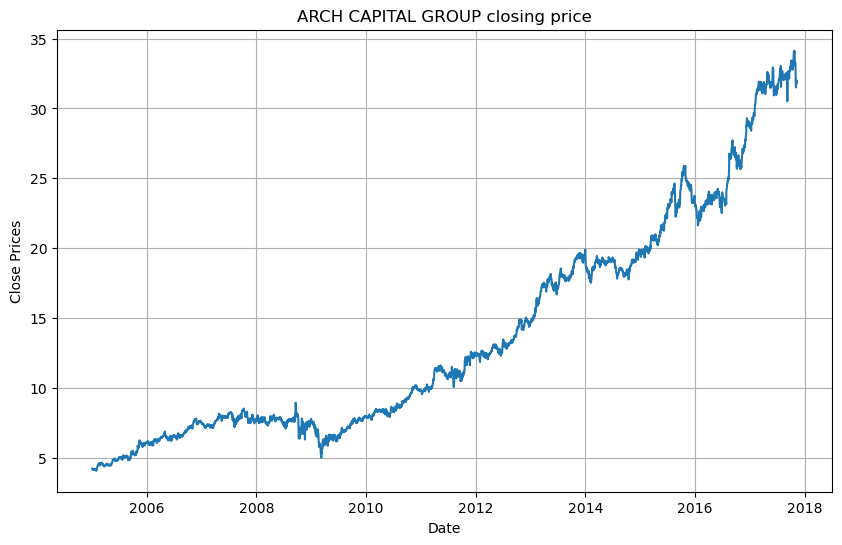

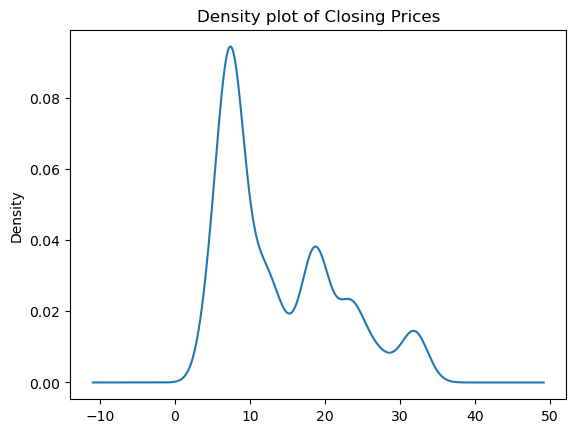

 ADF Statistic        1.402481
 p-value              0.997125

Failed to Reject Ho - Time Series is Non-Stationary



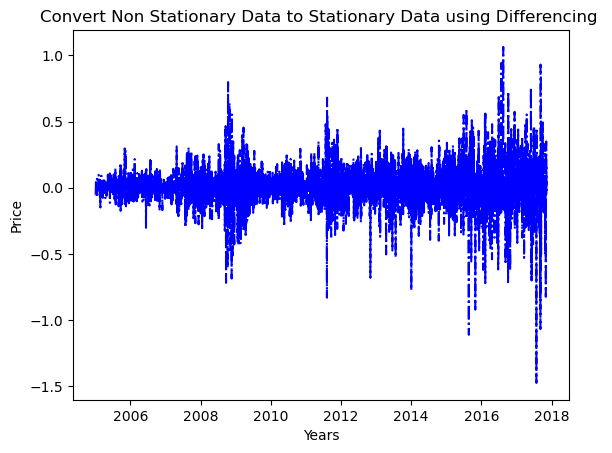

 ADF Statistic        -27.927383
 p-value              0.000000

Reject Ho - Time Series is Stationary



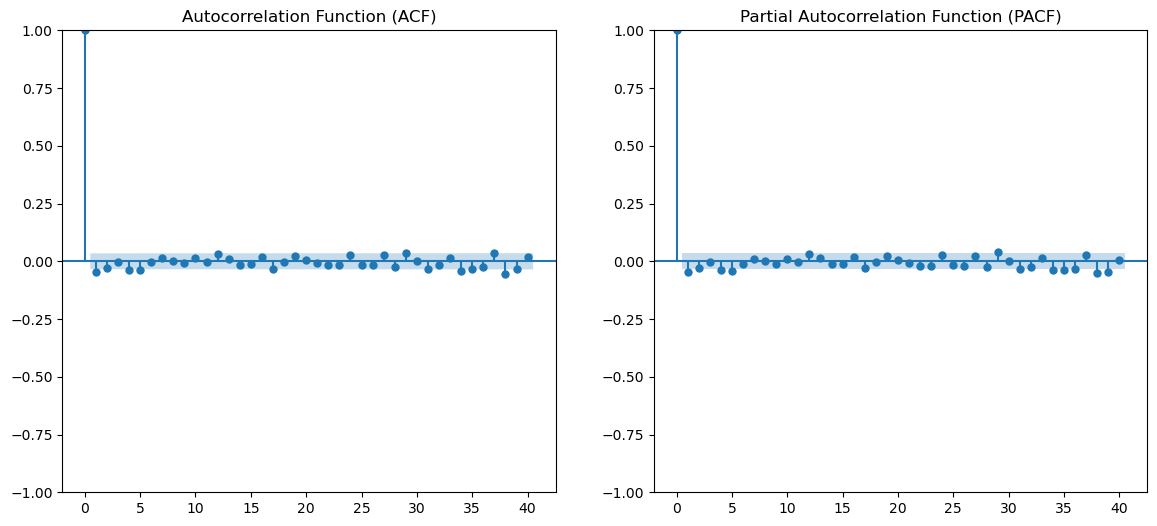

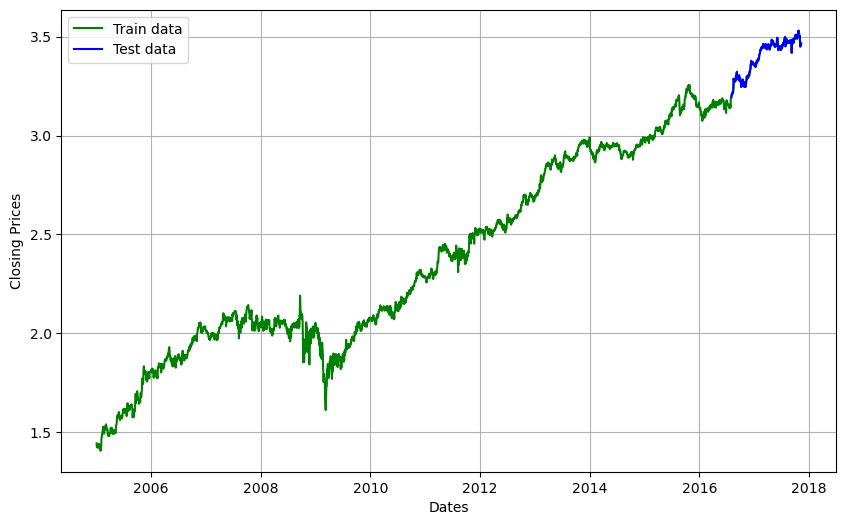

/Users/aashayzende/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashayzende/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashayzende/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aashayzende/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2911
Model:                 ARIMA(1, 1, 2)   Log Likelihood                8367.961
Date:                Tue, 22 Oct 2024   AIC                         -16727.921
Time:                        00:26:52   BIC                         -16704.017
Sample:                             0   HQIC                        -16719.310
                               - 2911                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    627.111      0.000       0.997       1.003
ma.L1         -1.1144      0.009   -120.688      0.000      -1.133      -1.096
ma.L2          0.1148      0.009     12.295      0.0

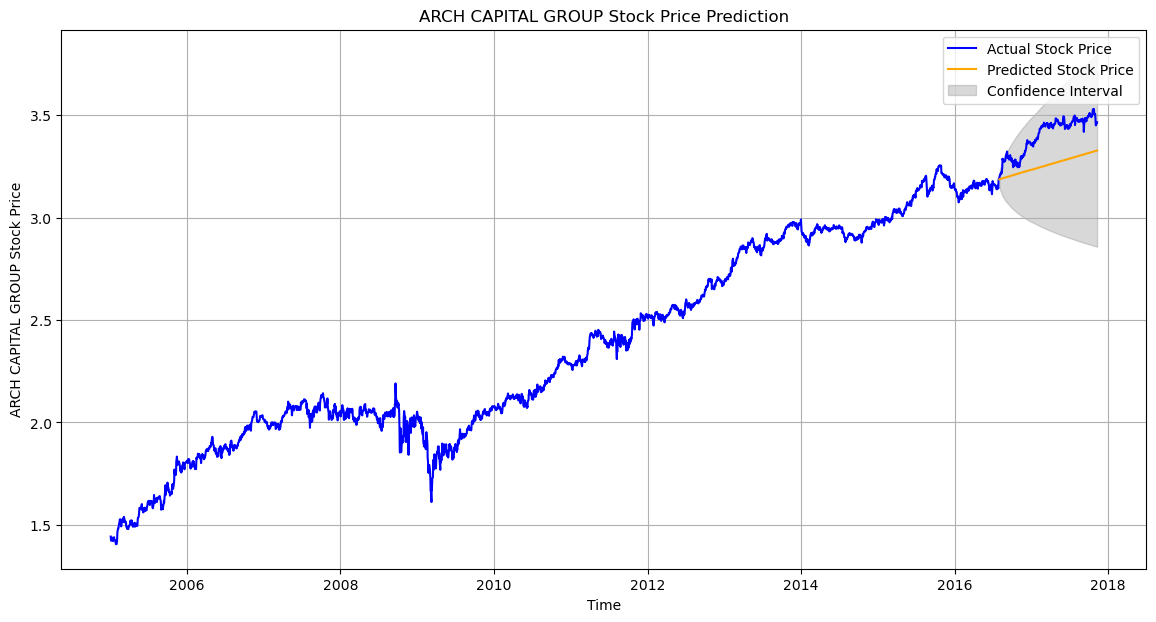

In [10]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf

# Load the dataset using yfinance
ticker = 'ACGL'
stock_data = yf.download(ticker, start='2005-01-01', end='2017-11-10')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Step 6: Augmented Dickey Fuller Test (ADF Test)
def stationarity_test(time_series):
    df_test = adfuller(time_series)

    print('{:25s} {:.6f}'.format("\033[1m ADF Statistic ", df_test[0]))
    print('{:25s} {:.6f}\n'.format("\033[1m p-value ", df_test[1]))

    if df_test[0] > df_test[4]["5%"]:
        print("\033[36m\033[1mFailed to Reject Ho - Time Series is Non-Stationary\n")
    else:
        print("\033[36m\033[1mReject Ho - Time Series is Stationary\n")

    a = pd.DataFrame([df_test[4]], index=['Critical Values'])
    return a

# Test the stationarity of the original series
stationarity_test(df_close)

# Step 7: Differencing to Make Data Stationary
tesla_price1 = df_close.diff(1).bfill()  # First order differencing
plt.xlabel('Years')
plt.ylabel('Price')
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(tesla_price1, 'b-.')
plt.show()

# Test stationarity after first differencing
stationarity_test(tesla_price1)

# ACF and PACF Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_acf(tesla_price1, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(tesla_price1, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Split Data into Training and Test Sets
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Build ARIMA Model
model = ARIMA(train_data, order=(1, 1, 2))  
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_result = fitted.get_forecast(steps=len(test_data))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Adjust the forecast length to match the test data length if needed
forecast = forecast[:len(test_data)]
conf_int = conf_int[:len(test_data)]

# Align the forecast index with the test data
dates_forecast = test_data.index
forecast.index = dates_forecast
conf_int.index = dates_forecast

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(forecast, label='Predicted Stock Price', color='orange')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


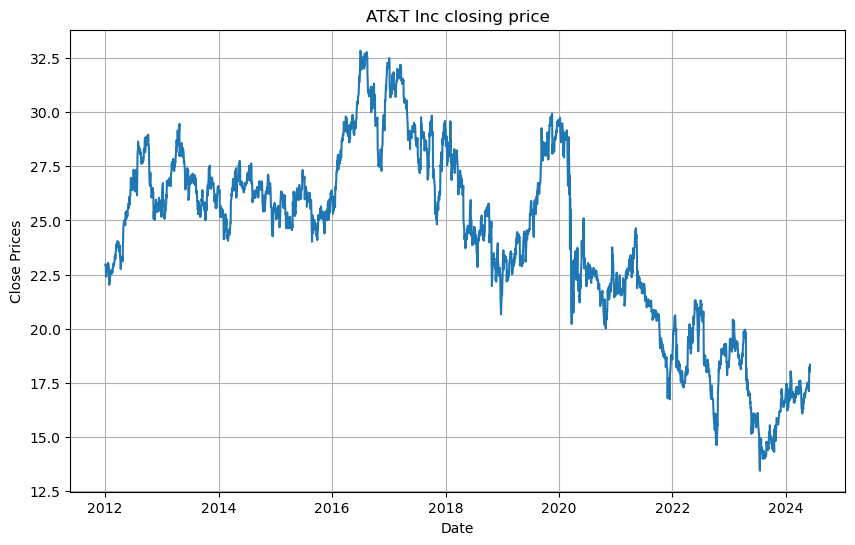

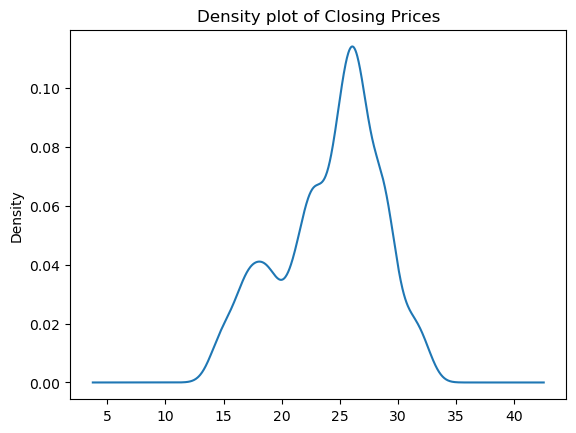

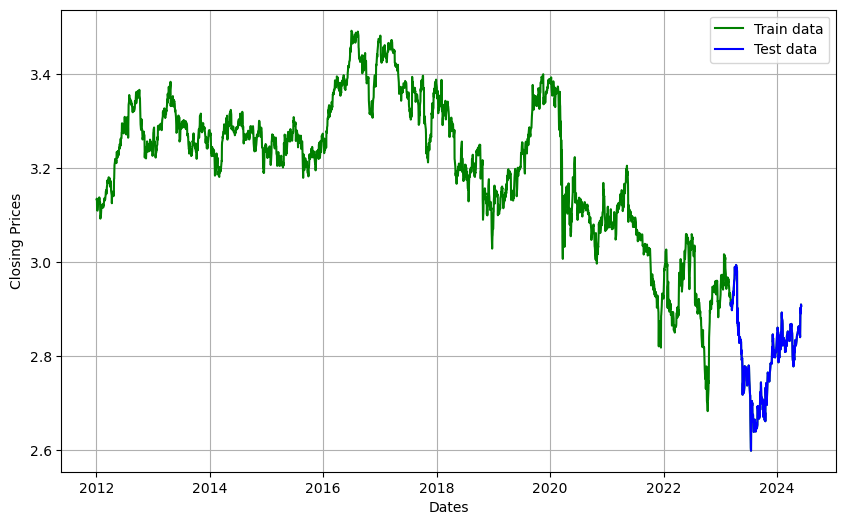

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0845
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0014
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0011
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 9.9834e-04
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0011
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 8.2318e-04
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 7.3377e-04
Epoch 8/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 7.4841e-04
Epoch 9/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 9.5555e-04
Epoch 10/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 6.7703e-04
Epoch 11/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 6.7243e-04
Epoch 12/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 6.3572e-04
Epoch 13/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 6.5026e-04
Epoch 14/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 6.1968e-04
Epoch 15/30
79/79 ━━━━━━━━━━━━━

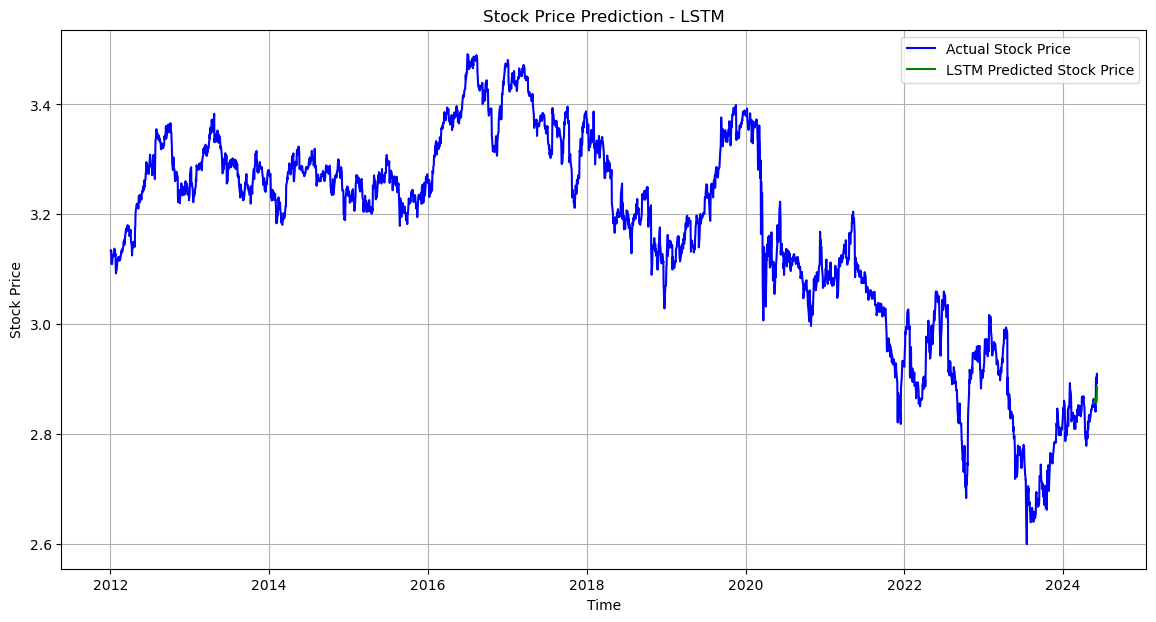

LSTM RMSE: 0.021917570462013314
LSTM MAE: 0.01637054120458011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

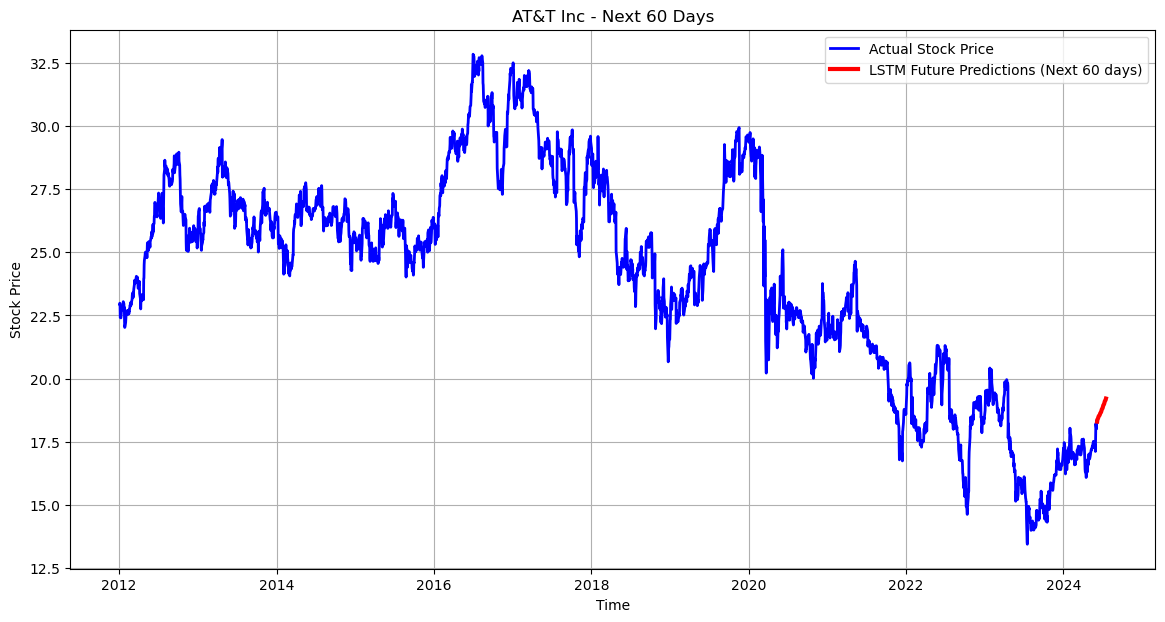

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


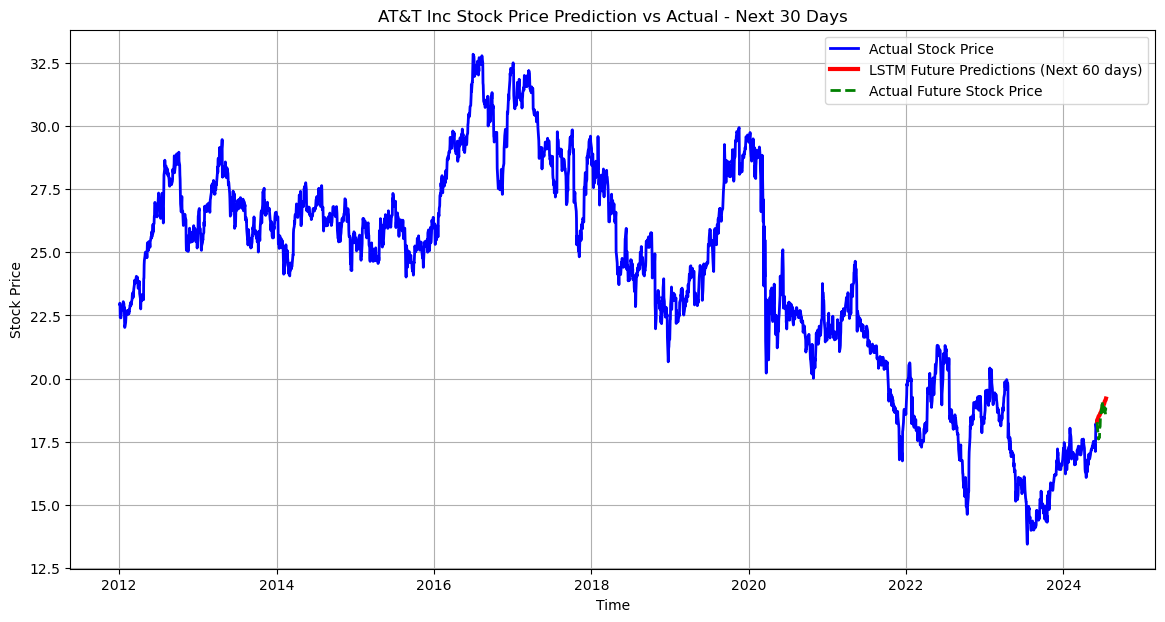

Mean Squared Error: 0.19569683195179635
Mean Absolute Error: 0.34390859250669126


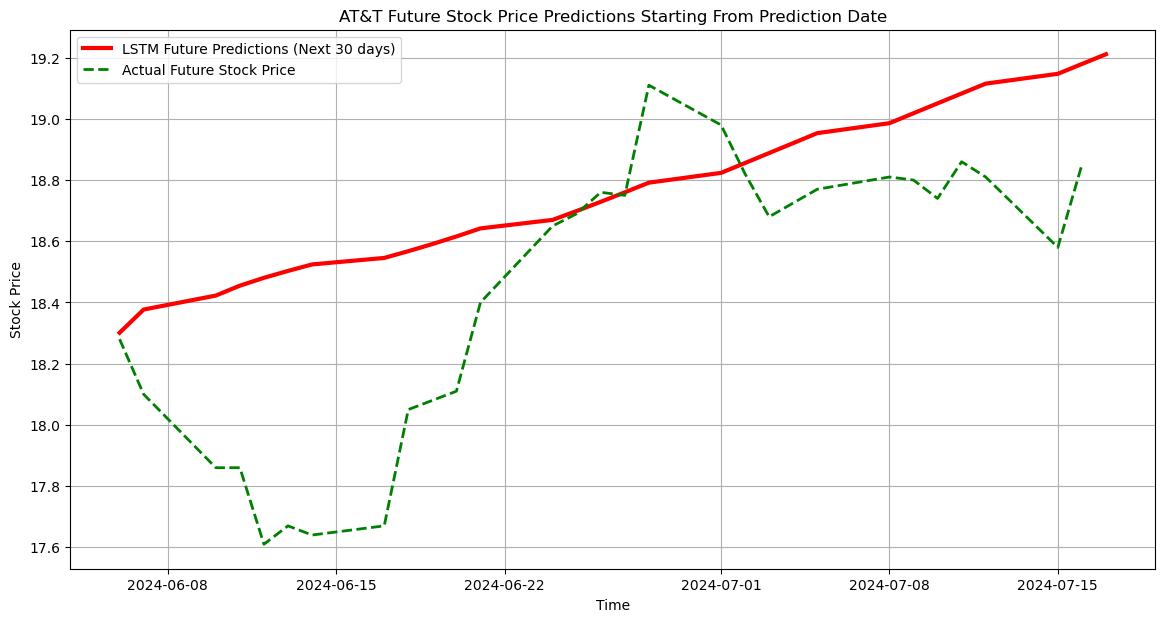

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset using yfinance
ticker = 'T'
stock_data = yf.download(ticker, start='2012-01-01', end='2024-06-06')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('AT&T Inc closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Log Transform
df_log = np.log(df_close)

# Split Data into Training and Test Sets
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_log.values.reshape(-1, 1))

train_size = int(len(df_scaled) * 0.9)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 300
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

# Make predictions using LSTM
lstm_train_predict = model_lstm.predict(X_train)
lstm_test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Convert predictions to same index as the test set
lstm_test_predict_series = pd.Series(lstm_test_predict.flatten(), index=df_log.index[-len(Y_test[0]):])

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(lstm_test_predict_series, label='LSTM Predicted Stock Price', color='green')
plt.title('Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
lstm_rmse = math.sqrt(mean_squared_error(test_data[-len(lstm_test_predict):], lstm_test_predict))
lstm_mae = mean_absolute_error(test_data[-len(lstm_test_predict):], lstm_test_predict)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(30):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=31, freq='B')[1:]  # Exclude last date, only future

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)
plt.title('AT&T Inc - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(30):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=31, freq='B')[1:]  # Exclude last date, only future

# Fetch the actual stock prices for the same future period using yfinance
actual_data = yf.download(ticker, start=future_dates[0], end=future_dates[-1])

# Plot the future predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('AT&T Inc Stock Price Prediction vs Actual - Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate the error between the predicted and actual values
predicted_prices = pd.Series(future_predictions.flatten(), index=future_dates)
actual_prices = actual_data['Close']

# Align the predictions and actual prices to the same index
aligned_predictions = predicted_prices.loc[actual_prices.index]

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, aligned_predictions)
mae = mean_absolute_error(actual_prices, aligned_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# New plot starting from the prediction point
plt.figure(figsize=(14, 7))

# Plot the predicted future values starting from the point of the last known actual data
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 30 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('AT&T Future Stock Price Predictions Starting From Prediction Date')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


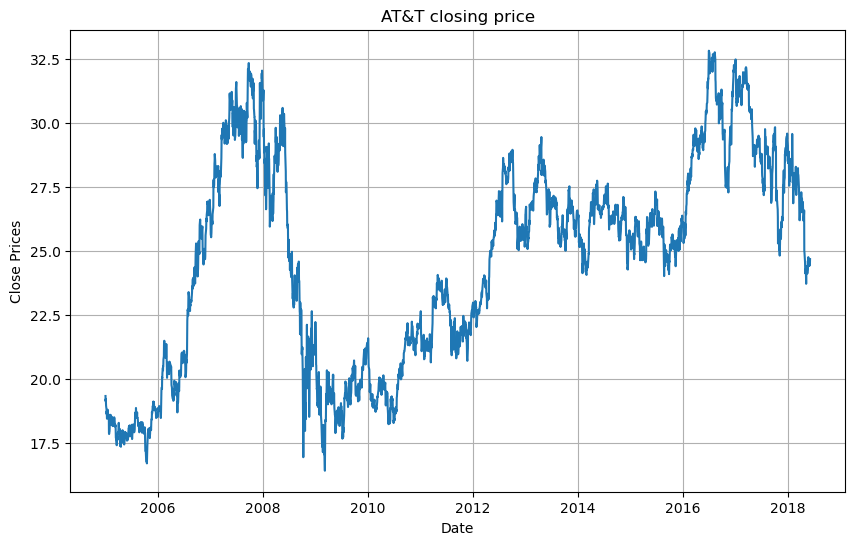

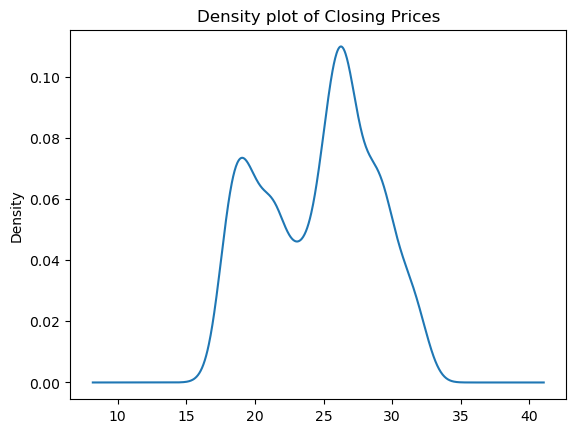

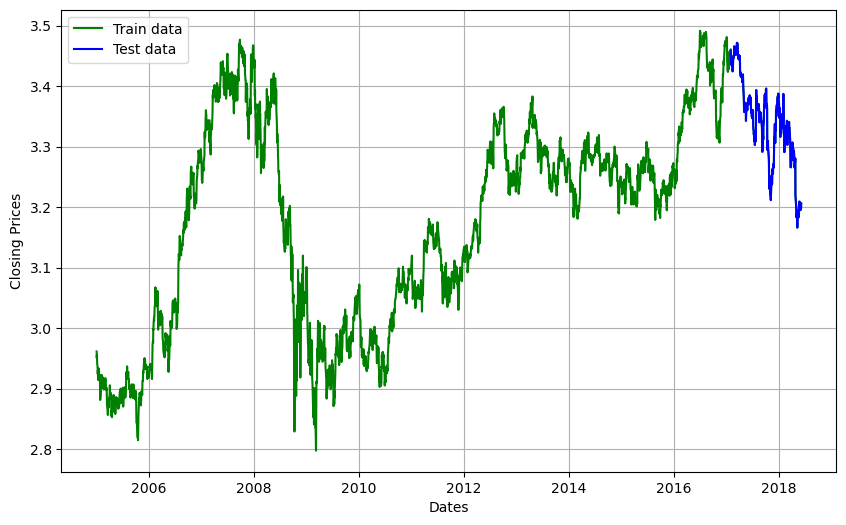

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 0.0683
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0017
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0016
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0015
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0015
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0012
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0012
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0011
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0011
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0011
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 9.6762e-04
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 9.7890e-04
Epoch 13/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 9.8618e-04
Epoch 14/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 8.6528e-04
Epoch 15/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - l

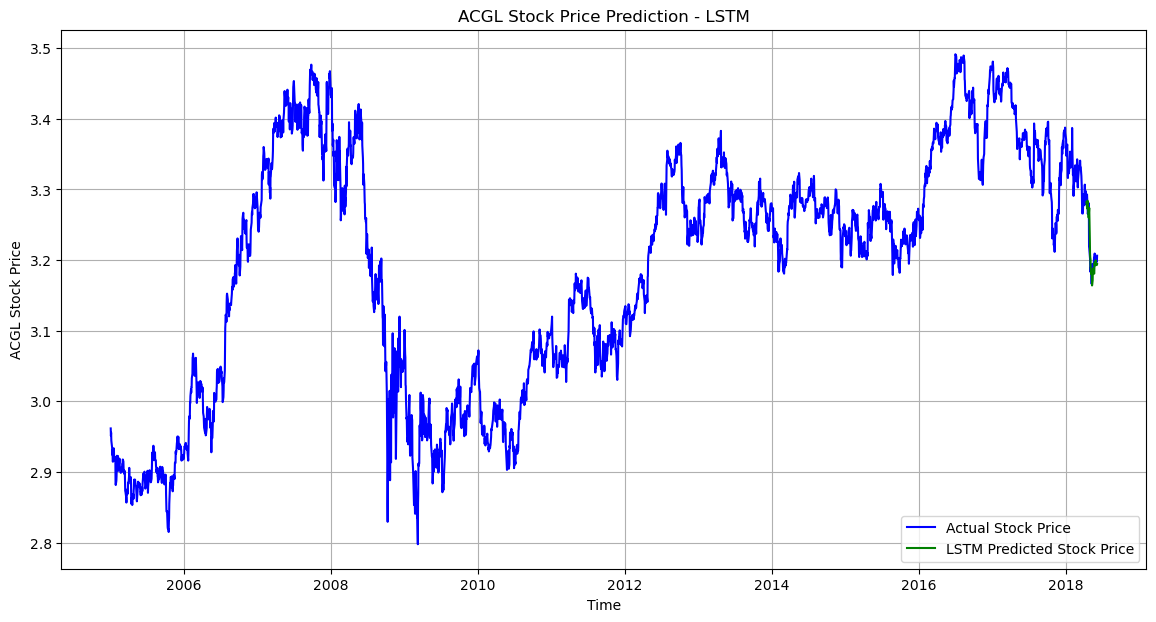

LSTM RMSE: 0.0174427301700418
LSTM MAE: 0.01247140468725609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

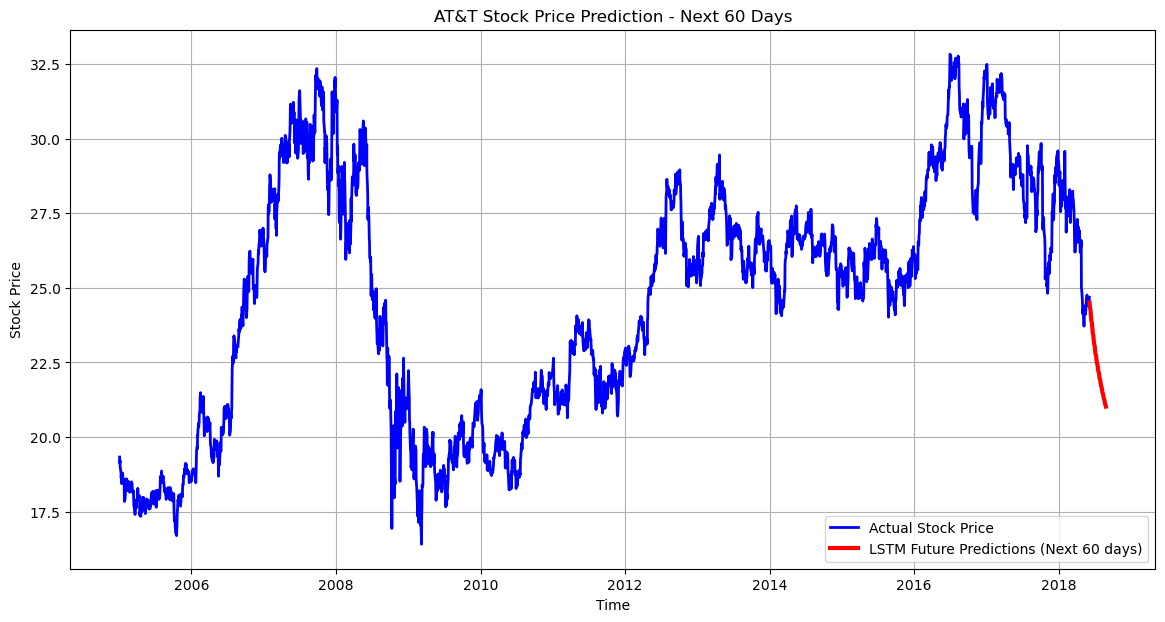

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


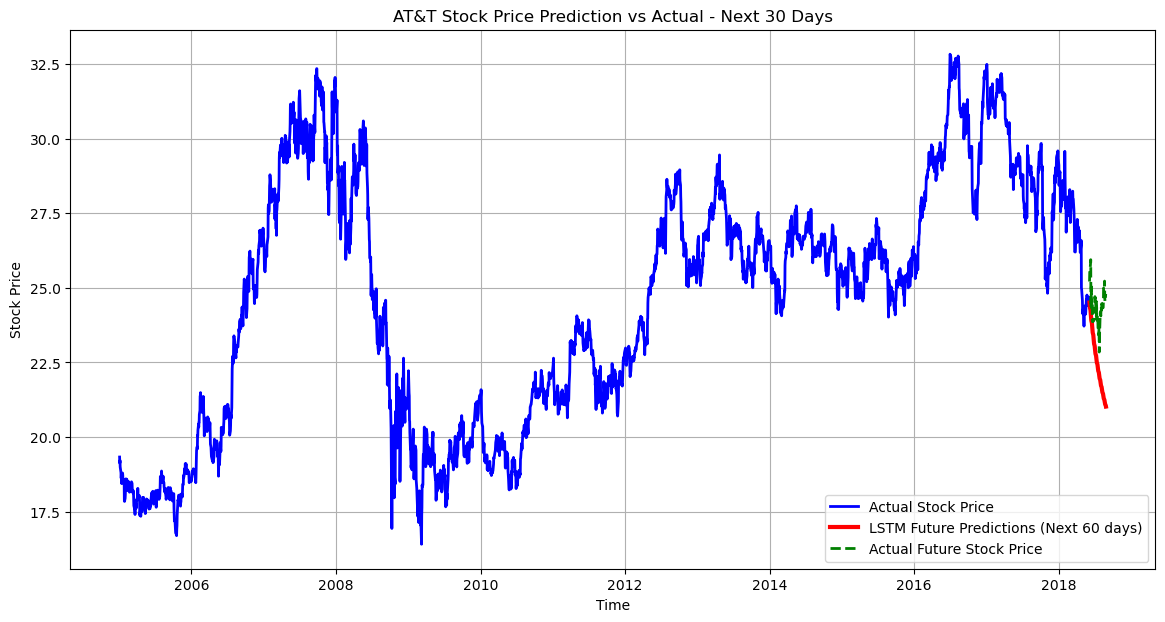

Mean Squared Error: 4.526378245958329
Mean Absolute Error: 1.8541811910168877


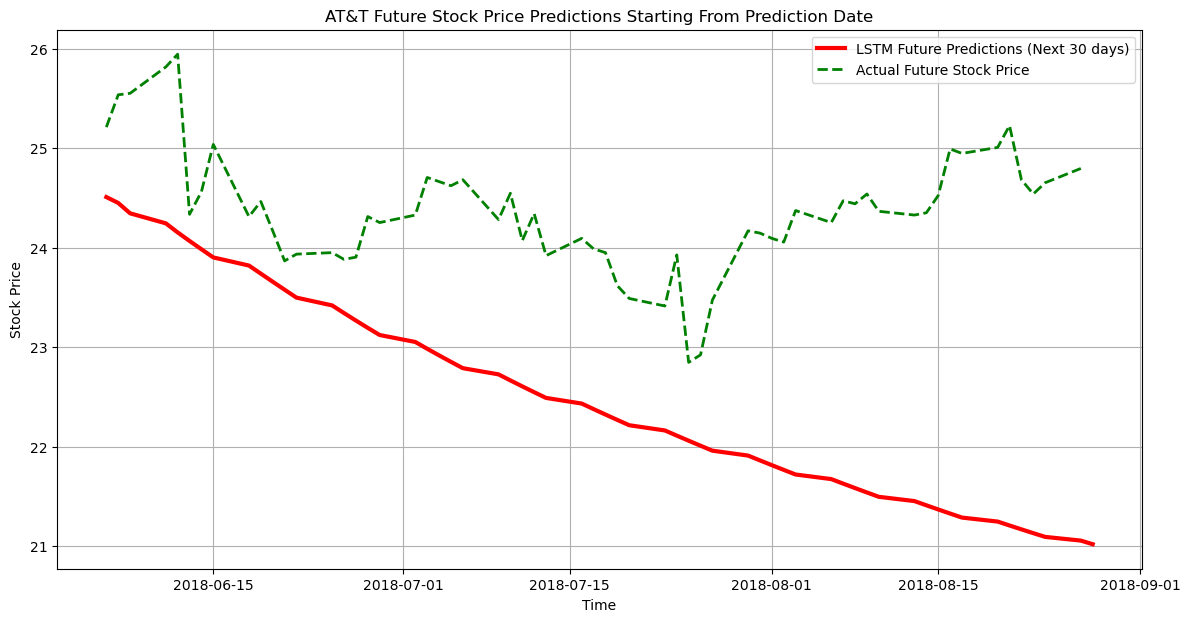

In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset using yfinance
ticker = 'T'
stock_data = yf.download(ticker, start='2005-01-01', end='2018-06-06')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('AT&T closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Log Transform
df_log = np.log(df_close)

# Split Data into Training and Test Sets
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_log.values.reshape(-1, 1))

train_size = int(len(df_scaled) * 0.9)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 300
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

# Make predictions using LSTM
lstm_train_predict = model_lstm.predict(X_train)
lstm_test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Convert predictions to same index as the test set
lstm_test_predict_series = pd.Series(lstm_test_predict.flatten(), index=df_log.index[-len(Y_test[0]):])

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(lstm_test_predict_series, label='LSTM Predicted Stock Price', color='green')
plt.title('ACGL Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('ACGL Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
lstm_rmse = math.sqrt(mean_squared_error(test_data[-len(lstm_test_predict):], lstm_test_predict))
lstm_mae = mean_absolute_error(test_data[-len(lstm_test_predict):], lstm_test_predict)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)
plt.title('AT&T Stock Price Prediction - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Fetch the actual stock prices for the same future period using yfinance
actual_data = yf.download(ticker, start=future_dates[0], end=future_dates[-1])

# Plot the future predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('AT&T Stock Price Prediction vs Actual - Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate the error between the predicted and actual values
predicted_prices = pd.Series(future_predictions.flatten(), index=future_dates)
actual_prices = actual_data['Close']

# Align the predictions and actual prices to the same index
aligned_predictions = predicted_prices.loc[actual_prices.index]

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, aligned_predictions)
mae = mean_absolute_error(actual_prices, aligned_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# New plot starting from the prediction point
plt.figure(figsize=(14, 7))

# Plot the predicted future values starting from the point of the last known actual data
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 30 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('AT&T Future Stock Price Predictions Starting From Prediction Date')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


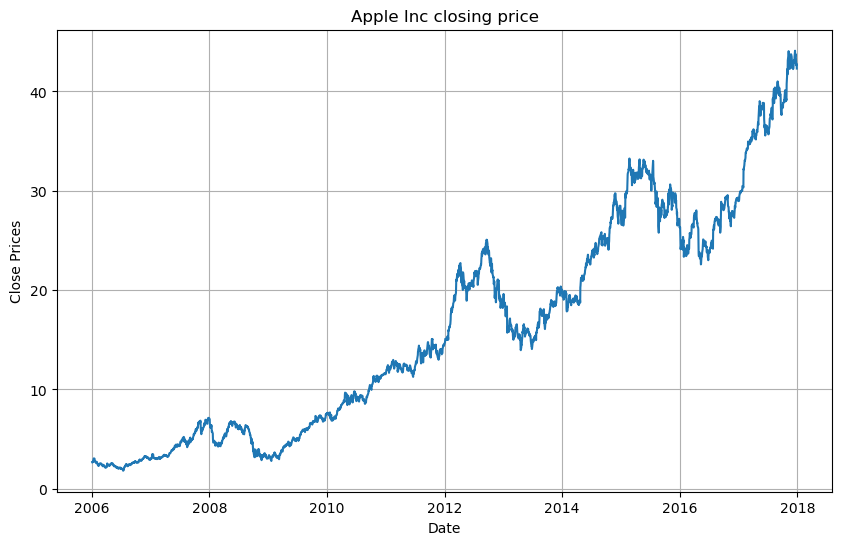

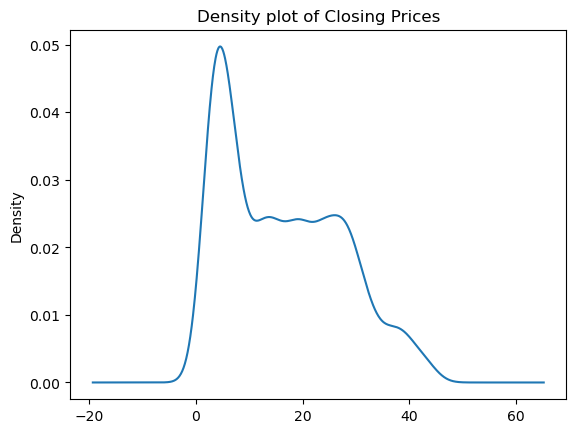

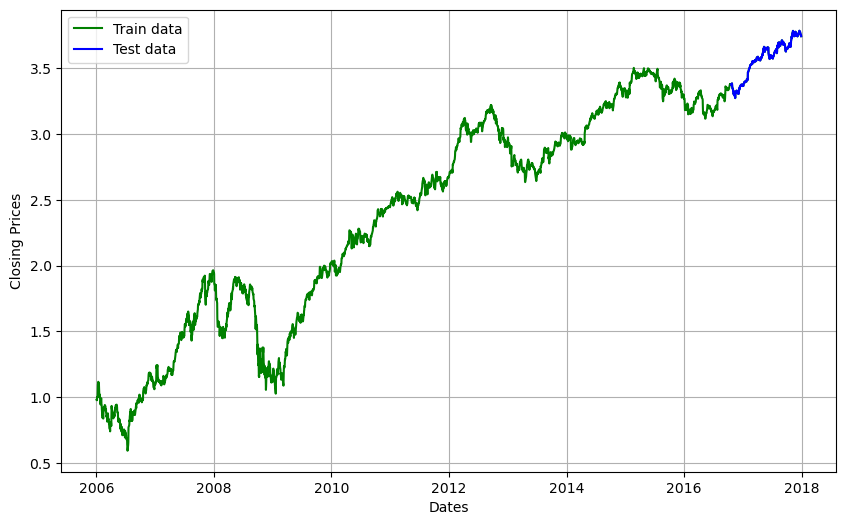

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0830
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 3.7141e-04
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 2.6474e-04
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.5632e-04
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 2.4852e-04
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.4658e-04
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 2.5703e-04
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.3611e-04
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 2.3926e-04
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.2352e-04
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.3378e-04
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.1539e-04
Epoch 13/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 2.2866e-04
Epoch 14/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 2.1609e-04
Epoch 15/30
76/76 ━

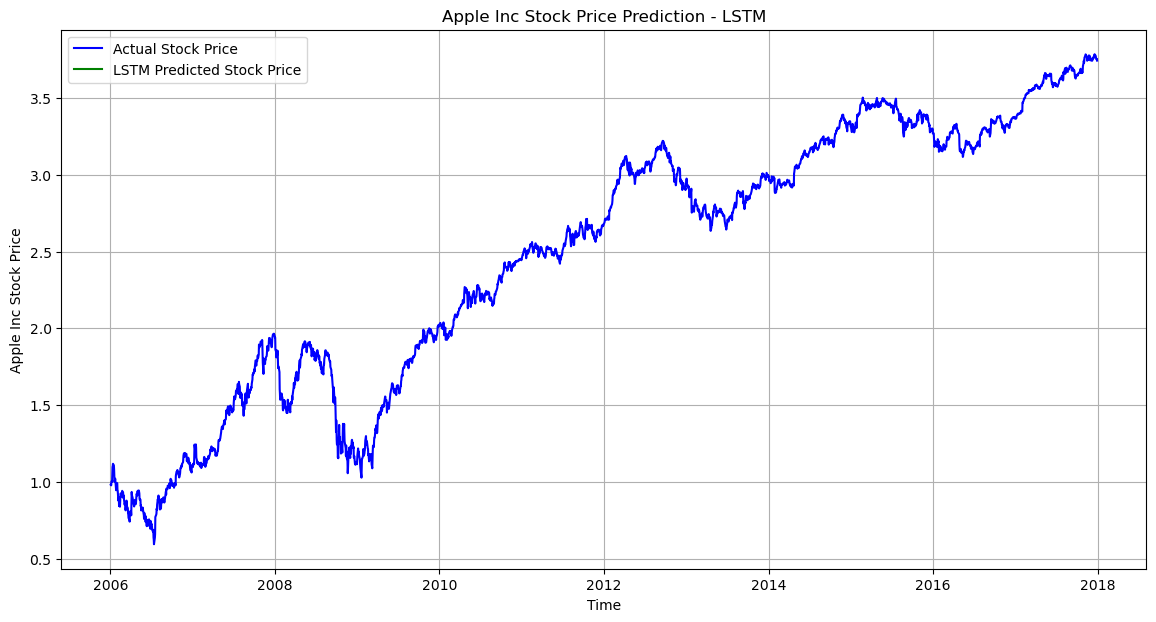

LSTM RMSE: 0.020954858472982618
LSTM MAE: 0.020954858472982618
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

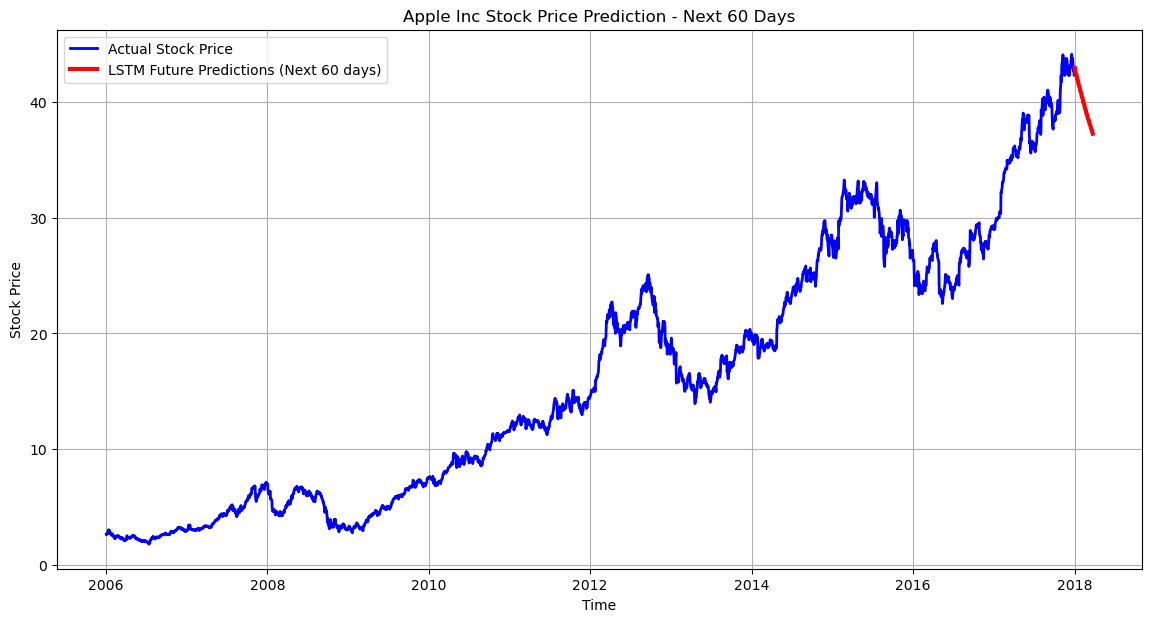

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


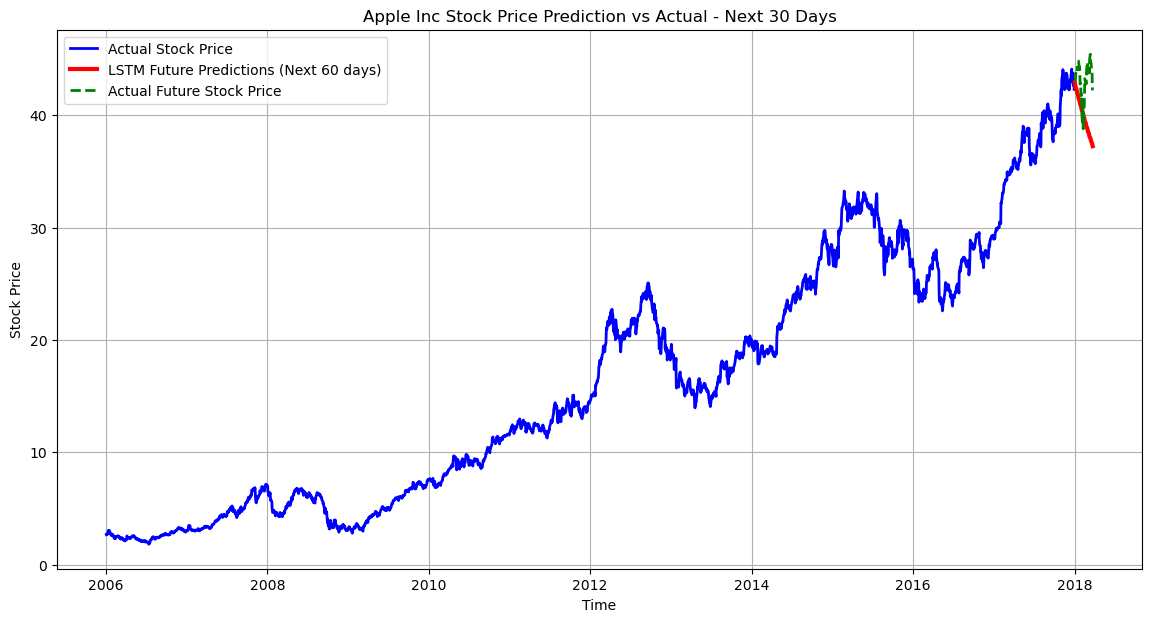

Mean Squared Error: 16.36818740425094
Mean Absolute Error: 3.3649672780718123


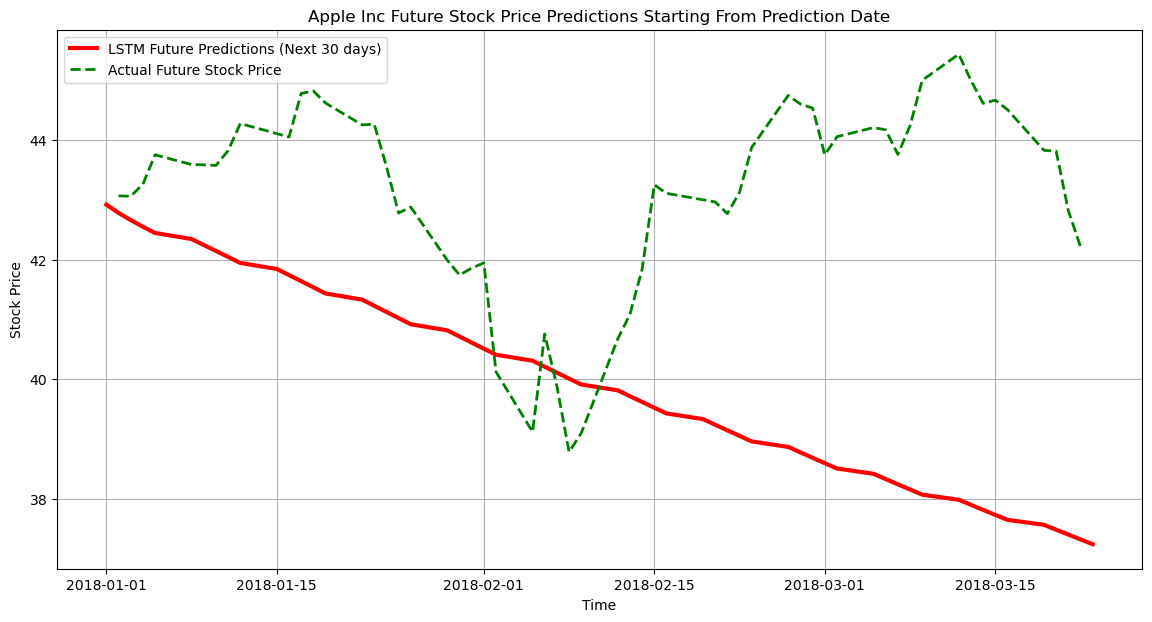

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset using yfinance
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2006-01-01', end='2018-01-01')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Apple Inc closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Log Transform
df_log = np.log(df_close)

# Split Data into Training and Test Sets
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_log.values.reshape(-1, 1))

train_size = int(len(df_scaled) * 0.9)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 300
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

# Make predictions using LSTM
lstm_train_predict = model_lstm.predict(X_train)
lstm_test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Convert predictions to same index as the test set
lstm_test_predict_series = pd.Series(lstm_test_predict.flatten(), index=df_log.index[-len(Y_test[0]):])

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(lstm_test_predict_series, label='LSTM Predicted Stock Price', color='green')
plt.title('Apple Inc Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('Apple Inc Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
lstm_rmse = math.sqrt(mean_squared_error(test_data[-len(lstm_test_predict):], lstm_test_predict))
lstm_mae = mean_absolute_error(test_data[-len(lstm_test_predict):], lstm_test_predict)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)
plt.title('Apple Inc Stock Price Prediction - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Fetch the actual stock prices for the same future period using yfinance
actual_data = yf.download(ticker, start=future_dates[0], end=future_dates[-1])

# Plot the future predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('Apple Inc Stock Price Prediction vs Actual - Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate the error between the predicted and actual values
predicted_prices = pd.Series(future_predictions.flatten(), index=future_dates)
actual_prices = actual_data['Close']

# Align the predictions and actual prices to the same index
aligned_predictions = predicted_prices.loc[actual_prices.index]

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, aligned_predictions)
mae = mean_absolute_error(actual_prices, aligned_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# New plot starting from the prediction point
plt.figure(figsize=(14, 7))

# Plot the predicted future values starting from the point of the last known actual data
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 30 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('Apple Inc Future Stock Price Predictions Starting From Prediction Date')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


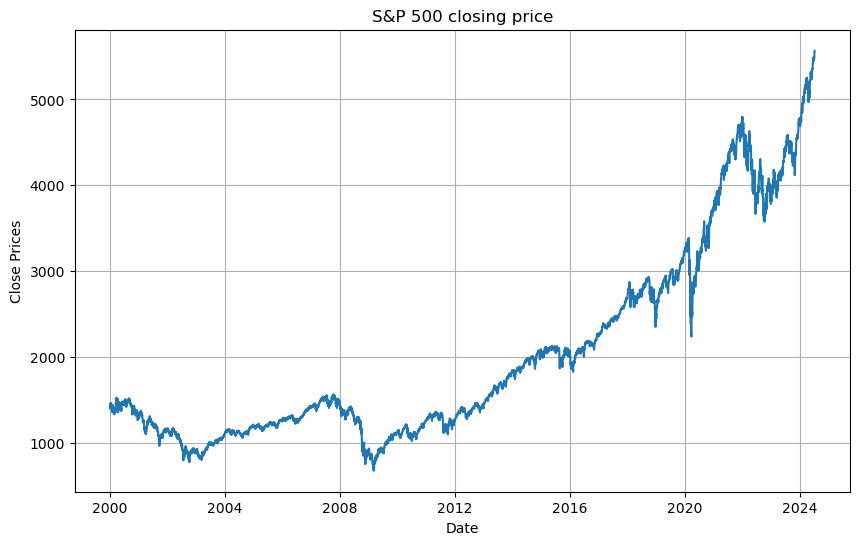

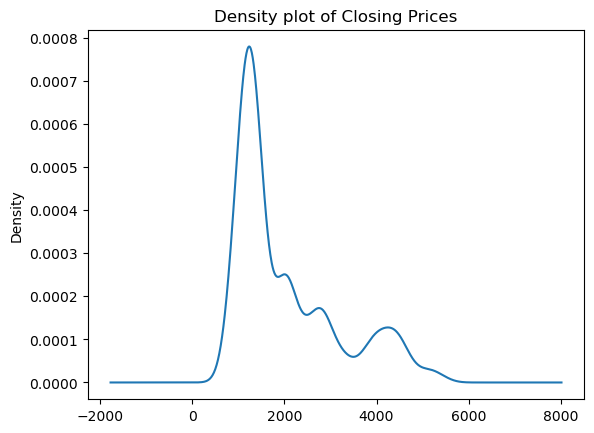

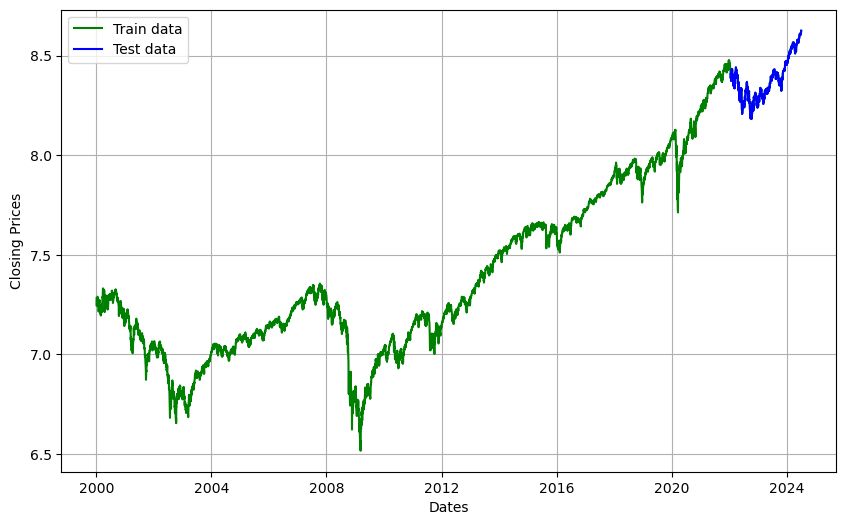

Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0148
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.3721e-04
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.3758e-04
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.4972e-04
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.3921e-04
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.3168e-04
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.2517e-04
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.2197e-04
Epoch 9/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.4314e-04
Epoch 10/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.1472e-04
Epoch 11/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.0890e-04
Epoch 12/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.0135e-04
Epoch 13/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 9.9421e-05
Epoch 14/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.

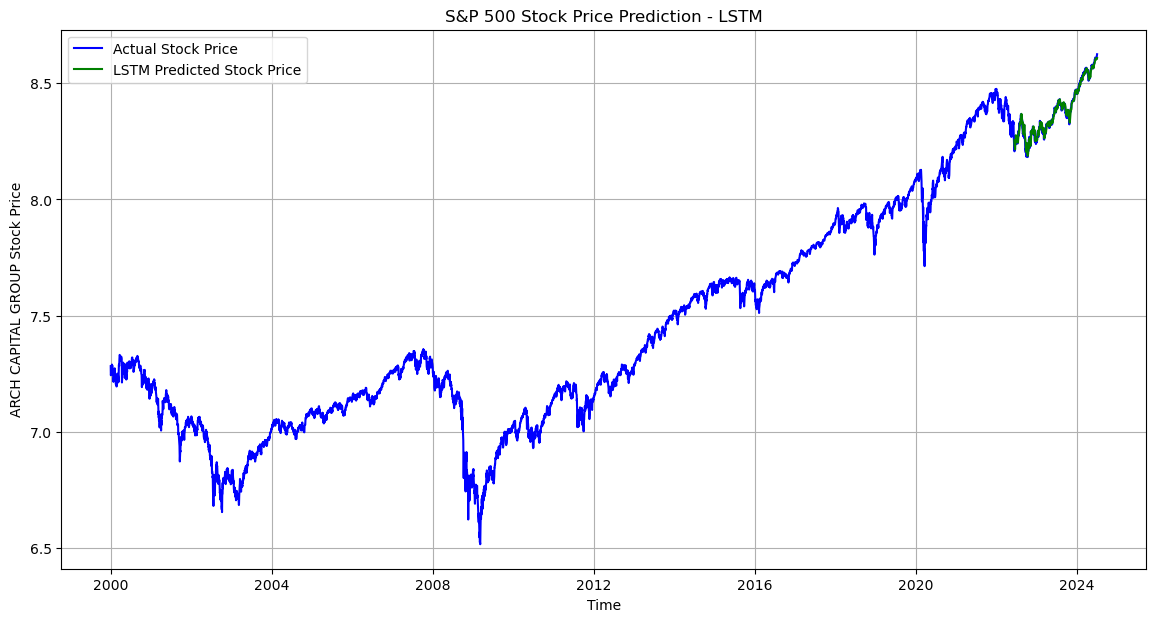

LSTM RMSE: 0.015265329435589507
LSTM MAE: 0.011930572217113819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━

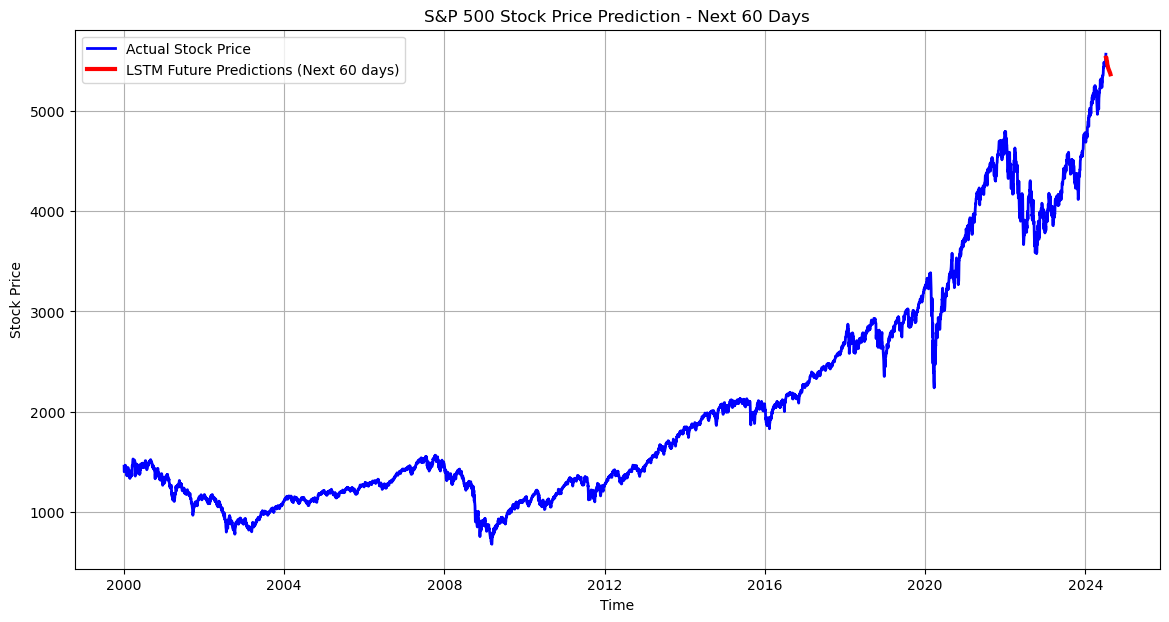

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

[*********************100%%**********************]  1 of 1 completed


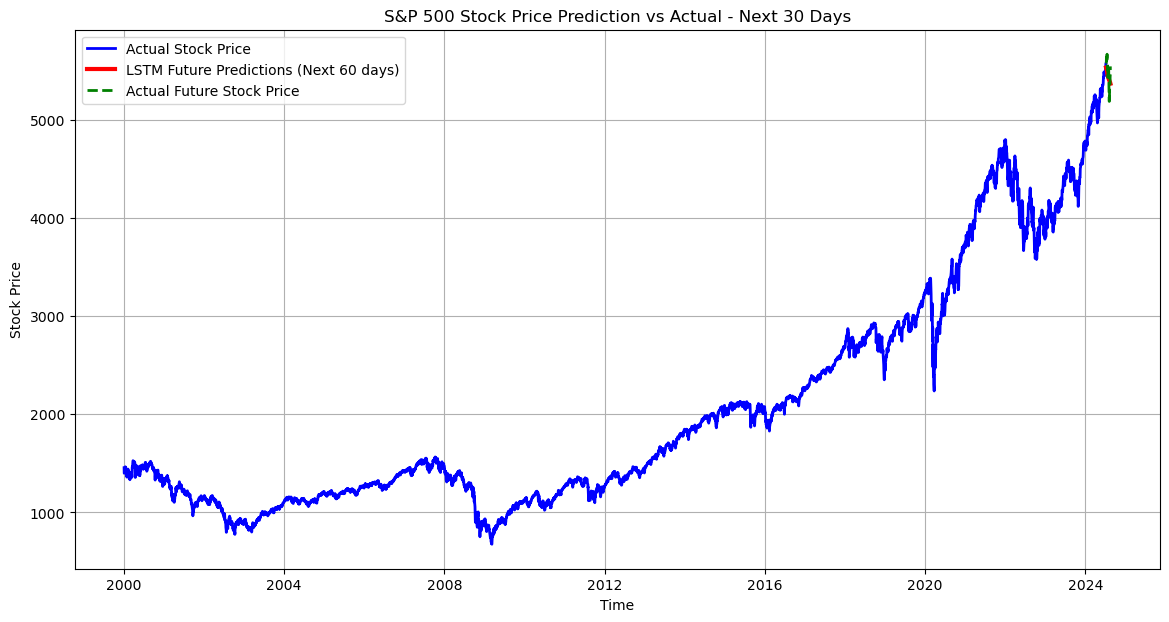

Mean Squared Error: 10408.386957990711
Mean Absolute Error: 85.72912176724138


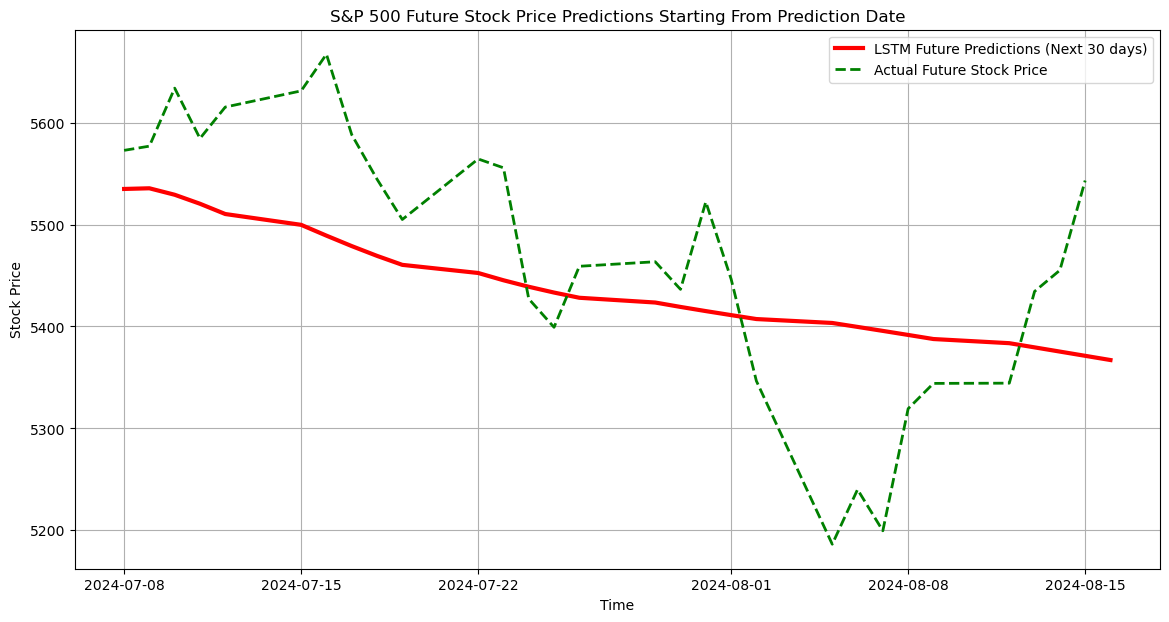

In [9]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset using yfinance
ticker = '^GSPC'
stock_data = yf.download(ticker, start='2000-01-01', end='2024-07-07')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('S&P 500 closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Log Transform
df_log = np.log(df_close)

# Split Data into Training and Test Sets
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_log.values.reshape(-1, 1))

train_size = int(len(df_scaled) * 0.9)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 100
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

# Make predictions using LSTM
lstm_train_predict = model_lstm.predict(X_train)
lstm_test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Convert predictions to same index as the test set
lstm_test_predict_series = pd.Series(lstm_test_predict.flatten(), index=df_log.index[-len(Y_test[0]):])

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(lstm_test_predict_series, label='LSTM Predicted Stock Price', color='green')
plt.title('S&P 500 Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
lstm_rmse = math.sqrt(mean_squared_error(test_data[-len(lstm_test_predict):], lstm_test_predict))
lstm_mae = mean_absolute_error(test_data[-len(lstm_test_predict):], lstm_test_predict)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(30):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=31, freq='B')[1:]  # Exclude last date, only future

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)
plt.title('S&P 500 Stock Price Prediction - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(30):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=31, freq='B')[1:]  # Exclude last date, only future

# Fetch the actual stock prices for the same future period using yfinance
actual_data = yf.download(ticker, start=future_dates[0], end=future_dates[-1])

# Plot the future predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('S&P 500 Stock Price Prediction vs Actual - Next 30 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate the error between the predicted and actual values
predicted_prices = pd.Series(future_predictions.flatten(), index=future_dates)
actual_prices = actual_data['Close']

# Align the predictions and actual prices to the same index
aligned_predictions = predicted_prices.loc[actual_prices.index]

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, aligned_predictions)
mae = mean_absolute_error(actual_prices, aligned_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# New plot starting from the prediction point
plt.figure(figsize=(14, 7))

# Plot the predicted future values starting from the point of the last known actual data
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 30 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('S&P 500 Future Stock Price Predictions Starting From Prediction Date')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


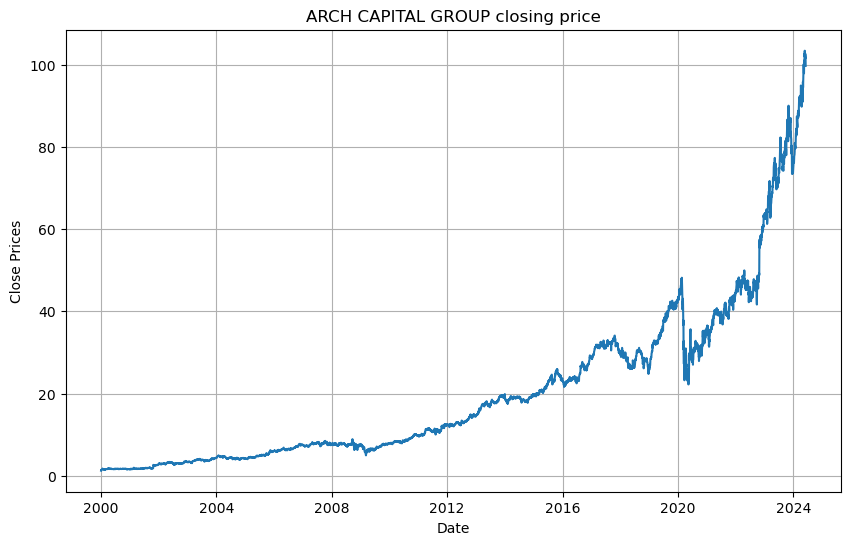

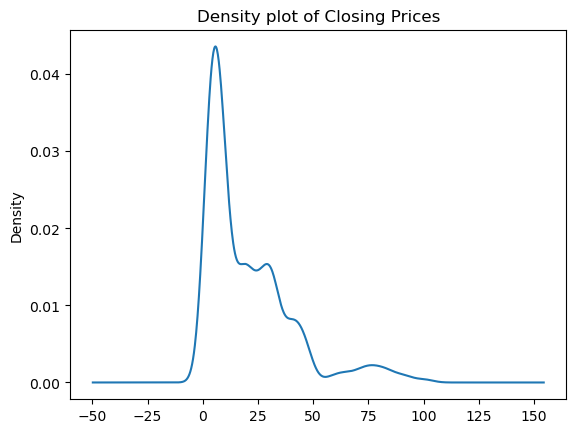

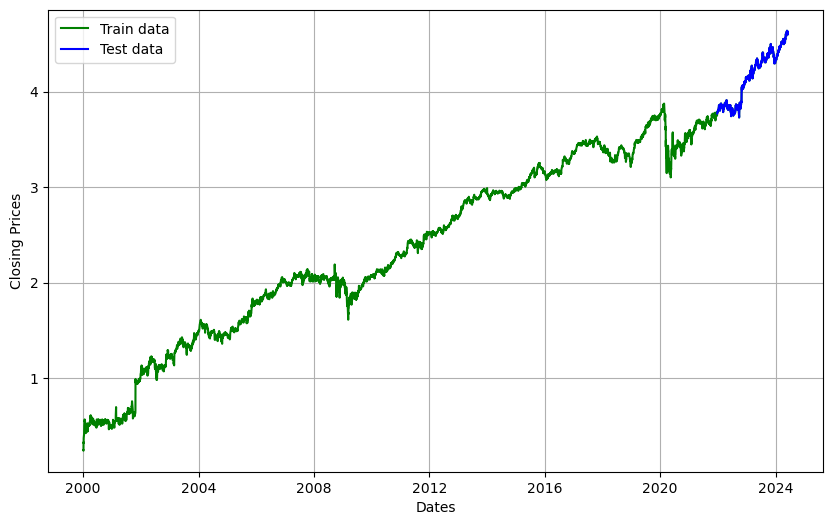

Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - loss: 0.0608
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 7.7404e-05
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - loss: 7.3562e-05
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - loss: 6.9646e-05
Epoch 5/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 8.0347e-05
Epoch 6/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 7.6306e-05
Epoch 7/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 7.2576e-05
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 6.8467e-05
Epoch 9/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 7.1688e-05
Epoch 10/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 6.4748e-05
Epoch 11/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 6.7650e-05
Epoch 12/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - loss: 7.2276e-05
Epoch 13/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 6.8892e-05
Epoch 14/30
158/158 ━━━━━━━━━━━━━━━━━━

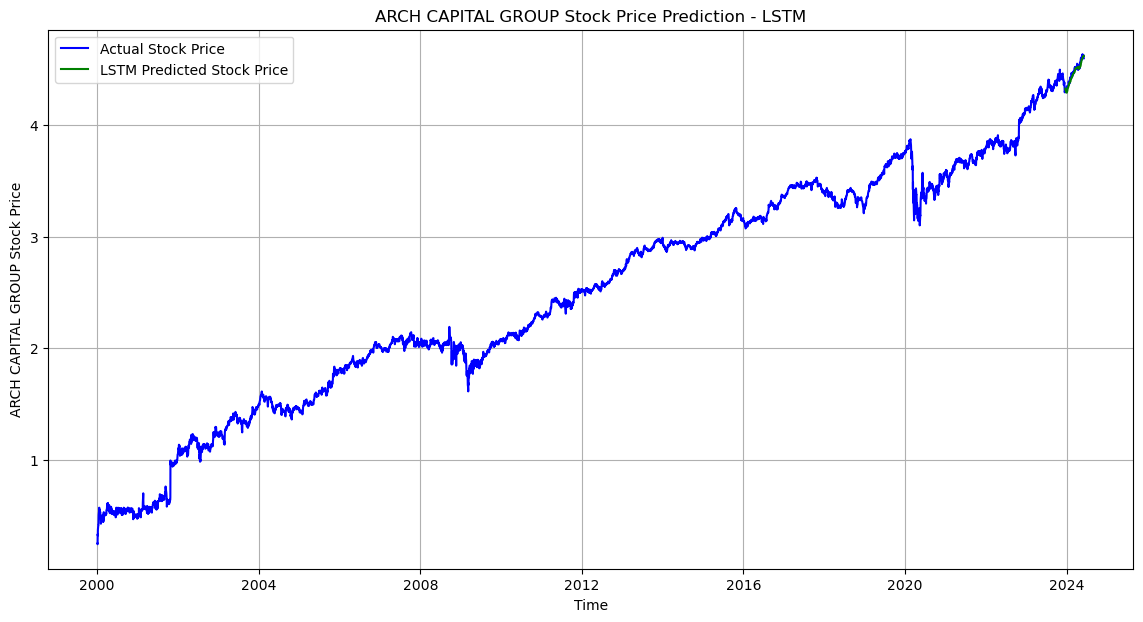

LSTM RMSE: 0.023449783043728915
LSTM MAE: 0.01893048654921392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

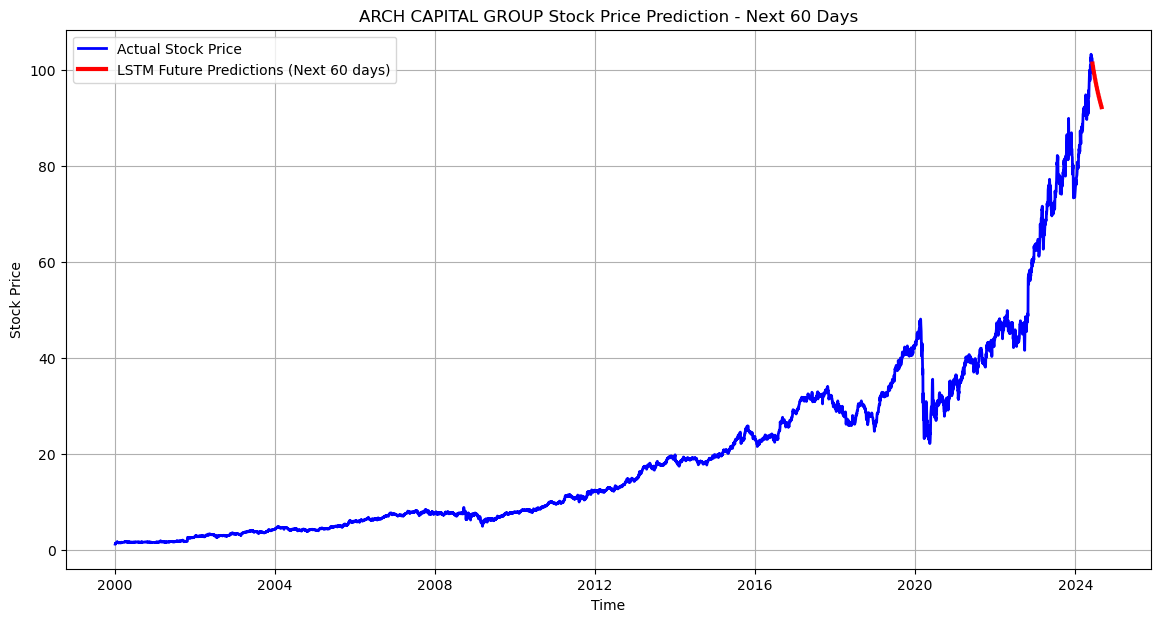

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


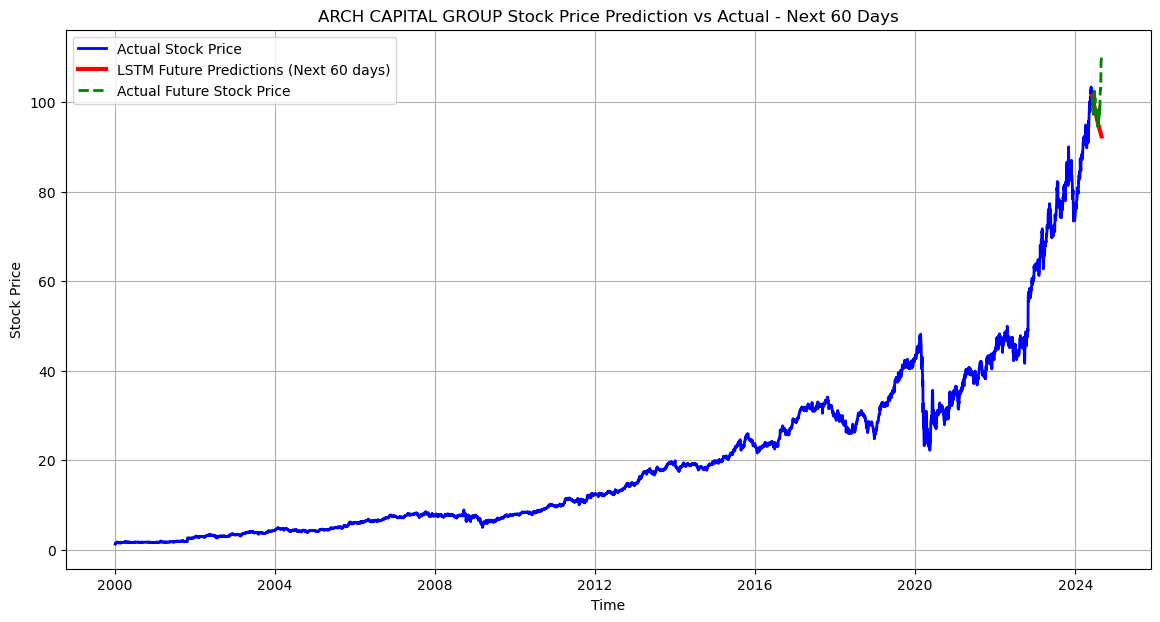

Mean Squared Error: 32.285907002611154
Mean Absolute Error: 3.612700077525356


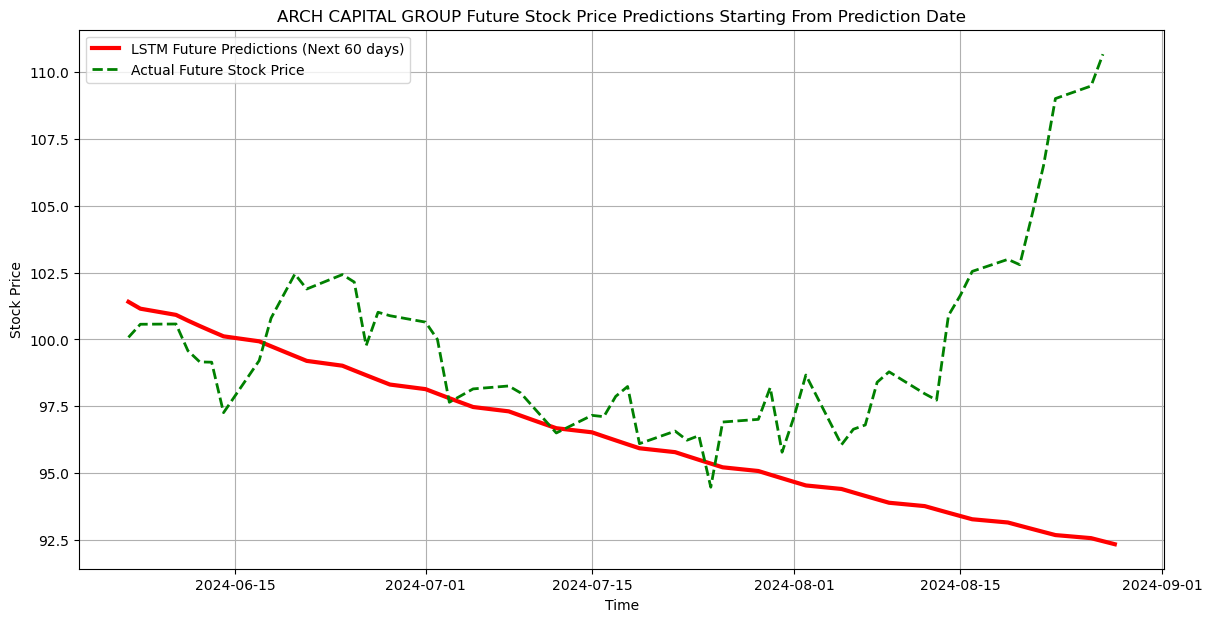

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset using yfinance
ticker = 'ACGL'
stock_data = yf.download(ticker, start='2000-01-01', end='2024-06-06')

# Visualize the Stock’s Daily Closing Price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

# Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')
plt.title('Density plot of Closing Prices')
plt.show()

# Log Transform
df_log = np.log(df_close)

# Split Data into Training and Test Sets
train_data, test_data = df_log[3:int(len(df_log) * 0.9)], df_log[int(len(df_log) * 0.9):]
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

# Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_log.values.reshape(-1, 1))

train_size = int(len(df_scaled) * 0.9)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Function to create dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 500
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create and fit the LSTM network
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1)

# Make predictions using LSTM
lstm_train_predict = model_lstm.predict(X_train)
lstm_test_predict = model_lstm.predict(X_test)

# Inverse transform the predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Convert predictions to same index as the test set
lstm_test_predict_series = pd.Series(lstm_test_predict.flatten(), index=df_log.index[-len(Y_test[0]):])

# Plot the LSTM results
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Actual Stock Price', color='blue')
plt.plot(lstm_test_predict_series, label='LSTM Predicted Stock Price', color='green')
plt.title('ARCH CAPITAL GROUP Stock Price Prediction - LSTM')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics
lstm_rmse = math.sqrt(mean_squared_error(test_data[-len(lstm_test_predict):], lstm_test_predict))
lstm_mae = mean_absolute_error(test_data[-len(lstm_test_predict):], lstm_test_predict)

print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM MAE: {lstm_mae}')
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Plot the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
# Predict the stock prices for the next 60 days using the trained LSTM model
last_60_days = df_log[-look_back:].values  # Get the last look_back days
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Create an empty list to store future predictions
future_predictions = []

# Make 60 future predictions
for i in range(60):
    X_input = last_60_days_scaled[-look_back:].reshape(1, look_back, 1)
    future_price = model_lstm.predict(X_input)
    future_predictions.append(future_price[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled, future_price).reshape(-1, 1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Since the original data was log-transformed, apply exponential transformation
future_predictions = np.exp(future_predictions)

# Create a date range for the future predictions
last_date = stock_data.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='B')[1:]  # Exclude last date, only future

# Fetch the actual stock prices for the same future period using yfinance
actual_data = yf.download(ticker, start=future_dates[0], end=future_dates[-1])

# Plot the future predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(df_close, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('ARCH CAPITAL GROUP Stock Price Prediction vs Actual - Next 60 Days')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, calculate the error between the predicted and actual values
predicted_prices = pd.Series(future_predictions.flatten(), index=future_dates)
actual_prices = actual_data['Close']

# Align the predictions and actual prices to the same index
aligned_predictions = predicted_prices.loc[actual_prices.index]

# Calculate error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, aligned_predictions)
mae = mean_absolute_error(actual_prices, aligned_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


# New plot starting from the prediction point
plt.figure(figsize=(14, 7))

# Plot the predicted future values starting from the point of the last known actual data
plt.plot(future_dates, future_predictions, label='LSTM Future Predictions (Next 60 days)', color='red', linewidth=3)

# Plot actual stock prices for the future dates
plt.plot(actual_data.index, actual_data['Close'], label='Actual Future Stock Price', color='green', linewidth=2, linestyle='--')

plt.title('ARCH CAPITAL GROUP Future Stock Price Predictions Starting From Prediction Date')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()